In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [7]:
start = '2012-01-01'
end = '2024-04-23'

stock = 'TSLA'

data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [9]:
data.reset_index(inplace=True)

In [10]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
1,2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2,2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
3,2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
4,2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000
...,...,...,...,...,...,...,...
3090,2024-04-16,156.740005,158.190002,153.750000,157.110001,157.110001,97000000
3091,2024-04-17,157.639999,158.330002,153.779999,155.449997,155.449997,82439700
3092,2024-04-18,151.250000,152.199997,148.699997,149.929993,149.929993,96098800
3093,2024-04-19,148.970001,150.940002,146.220001,147.050003,147.050003,86005100


In [12]:
ma_100_days = data.Close.rolling(100).mean()

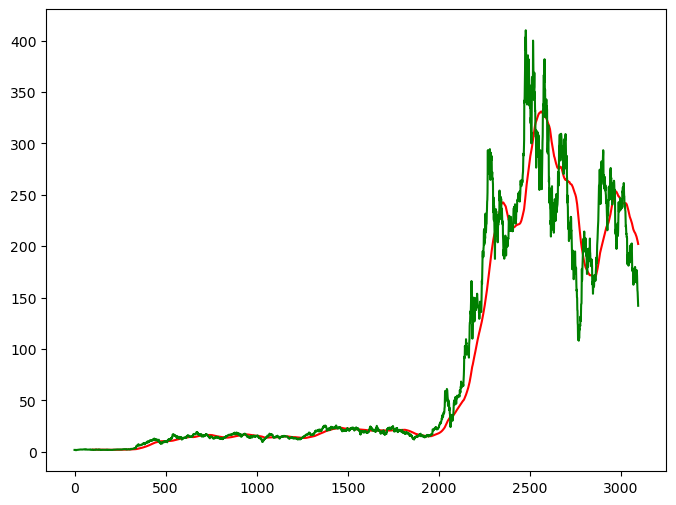

In [14]:
plt.figure(figsize = (8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [15]:
ma_200_days = data.Close.rolling(200).mean()

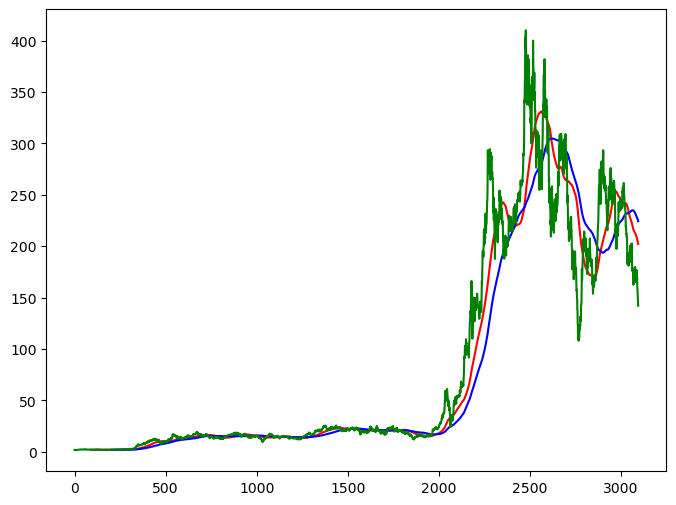

In [16]:
plt.figure(figsize = (8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [17]:
data.dropna(inplace=True)

In [29]:
data_train = pd.DataFrame((data.Close[0: int(len(data)*0.80)]))
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [30]:
data_train.shape[0], data_test.shape[0]

(2476, 619)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [36]:
data_train_scale = scaler.fit_transform(data_train)

In [43]:
x = []
y = []

for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [44]:
x, y = np.array(x), np.array(y)

In [45]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 

In [48]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True,
              input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))
          
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units = 1))

In [49]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [50]:
model.fit(x,y,epochs=50, batch_size = 32, verbose = 1)

Epoch 1/50
75/75 [==============================] - 13s 137ms/step - loss: 0.0081
Epoch 2/50
75/75 [==============================] - 11s 141ms/step - loss: 0.0023
Epoch 3/50
75/75 [==============================] - 12s 163ms/step - loss: 0.0021
Epoch 4/50
75/75 [==============================] - 12s 156ms/step - loss: 0.0020
Epoch 5/50
75/75 [==============================] - 11s 142ms/step - loss: 0.0026
Epoch 6/50
75/75 [==============================] - 11s 142ms/step - loss: 0.0021
Epoch 7/50
75/75 [==============================] - 11s 142ms/step - loss: 0.0017
Epoch 8/50
75/75 [==============================] - 11s 141ms/step - loss: 0.0019
Epoch 9/50
75/75 [==============================] - 11s 142ms/step - loss: 0.0016
Epoch 10/50
75/75 [==============================] - 11s 142ms/step - loss: 0.0017
Epoch 11/50
75/75 [==============================] - 11s 141ms/step - loss: 0.0017
Epoch 12/50
75/75 [==============================] - 11s 141ms/step - loss: 0.0015
Epoch 13/50
7

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [52]:
pas_100_days = data_train.tail(100)

In [53]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [55]:
data_test_scale = scaler.fit_transform(data_test)

In [58]:
x = []
y = []

for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
    
x, y = np.array(x), np.array(y)

In [59]:
y_predict = model.predict(x)

20/20 [==============================] - 1s 35ms/step


In [63]:
scale = 1/scaler.scale_

In [66]:
y_predict = y_predict*scale

In [67]:
y=y*scale

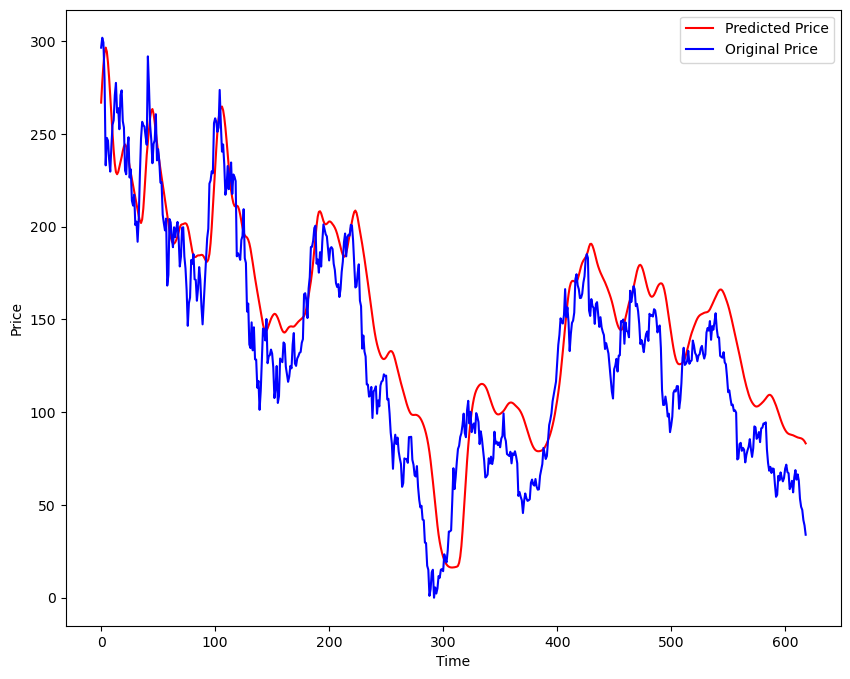

In [68]:
plt.figure(figsize = (10,8))
plt.plot(y_predict , 'r', label = "Predicted Price")
plt.plot(y, 'b', label = "Original Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [69]:
 model.save('Stock Price Prediction Model.keras')